<h1>Análise Exploratória de Dados Socioeconômicos</h1>

Este é um mini-projeto de análise de dados socioeconômicos. A base de dados utilizada, foi o dataset "World Happiness Report Data", disponível em https://data.world/laurel/world-happiness-report-data.

O objetivo desta análise, é responder e confirmar algumas questões de conhecimentos gerais, como por exemplo: correlação entre renda per capita e expectativa de vida; correlação entre nível de vida de uma população e conscientização sobre corrupção nos negócios e governo; entre outros aspectos que você poderá verificar mais adiante neste documento.

Como ferramenta de análise, será utilizada a linguagem R.

In [2]:
# Carregando bibliotecas da linguagem
library(dplyr, verbose = FALSE)
library(ggplot2)

# Carregando os dados
dados <- read.csv("dataset.csv")
View(head(dados, n = 20)) #printando apenas 


,Country.name,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
7,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
8,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
9,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348


In [3]:
dim(dados) # 11 variáveis e 1949 registros
str(dados)
summary(dados)

[1] 1949   11

'data.frame':	1949 obs. of  11 variables:
 $ Country.name                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ year                            : int  2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect     

 Country.name            year       Life.Ladder    Log.GDP.per.capita
 Length:1949        Min.   :2005   Min.   :2.375   Min.   : 6.635    
 Class :character   1st Qu.:2010   1st Qu.:4.640   1st Qu.: 8.464    
 Mode  :character   Median :2013   Median :5.386   Median : 9.460    
                    Mean   :2013   Mean   :5.467   Mean   : 9.368    
                    3rd Qu.:2017   3rd Qu.:6.283   3rd Qu.:10.353    
                    Max.   :2020   Max.   :8.019   Max.   :11.648    
                                                   NA's   :36        
 Social.support   Healthy.life.expectancy.at.birth Freedom.to.make.life.choices
 Min.   :0.2900   Min.   :32.30                    Min.   :0.2580              
 1st Qu.:0.7498   1st Qu.:58.69                    1st Qu.:0.6470              
 Median :0.8355   Median :65.20                    Median :0.7630              
 Mean   :0.8126   Mean   :63.36                    Mean   :0.7426              
 3rd Qu.:0.9050   3rd Qu.:68.59         

<h2>Análise Exploratória e Limpeza</h2>

In [4]:
paste("Temos", sum(is.na(dados)), "valores missing no dataset")

complete_cases <- sum(complete.cases(dados)) #1708 linhas

not_complete_cases <- sum(!complete.cases(dados)) #241

percentual <- (not_complete_cases / complete_cases) * 100
paste("Porcentagem dos registros que possuem valores missing:" , round(percentual, 2), "%")

[1] "Temos 373 valores missing no dataset"

[1] "Porcentagem dos registros que possuem valores missing: 14.11 %"

<h3>Alterando nomes das colunas</h3>
Vamos alterar os nomes de cada variável (colunas), de modo que fique mais fácil o entendimento do que representa cada uma dessas colunas.

In [5]:
myColumns <- colnames(dados)

myColumns[1] <- "NomePais"
myColumns[2] <- "Ano"
myColumns[3] <- "IndicadorNivelVida"
myColumns[4] <- "PIB_Per_Capita"
myColumns[5] <- "SuporteSocial"
myColumns[6] <- "ExpectativaVida"
myColumns[7] <- "IndicadorLiberdade"
myColumns[8] <- "IndicadorGenerosidade"
myColumns[9] <- "IndicadorCorrupcao"
myColumns[10] <- "IndicadorEmocoesPositivas"
myColumns[11] <- "IndicadorEmocoesNegativas"

colnames(dados) <- myColumns #Renomeando o dataset

<h3>Verificando quantos países estão presentes em nossos dados</h3>

In [6]:
length(unique(dados$NomePais))

[1] 166

Nosso dataset possui 373 valores NA, o que pode atrapalhar os cálculos mais adiante. Seria possível neste caso, realizar imputação de determinado indicador socioeconômico missing, calculando a média dos indicadores da mesma categoria dos anos anteriores e/ou posteriores (do mesmo país!). Porém, se adotarmos este caminho, poderemos obter resultados que não retratariam a realidade.

In [ ]:
## Listando os países ##

print("Com valores missing no dataset")
list_countries_with_na <- unique(dados$NomePais)
list_countries_with_na

print("Eliminando os registros com valores missing")
dados <- na.omit(dados)
dim(dados)

print("Listando os países - após remoção de registros com valres NA")
list_countries_without_na <- unique(dados$NomePais)
list_countries_without_na

setdiff(list_countries_with_na, list_countries_without_na)


Perdemos 11 países da lista após remover valores missing do dataset.
Estes 11 países, todos estavam com algum valor NA em todos os anos registrados, portanto escolhi eliminá-los.

Os próximos passos, serão ver quais anos estão presentes na pesquisa e verificar a quantidade de registros para cada ano.

In [23]:
anos <- unique(dados$Ano)
range(anos)

table(dados$Ano)

[1] 2005 2020


2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 
   1   74   94  101  106  112  132  121  124  127  127  124  132  126  126   81 

Podemos perceber que temos quantidade diferente de registros para cada ano. Neste caso, não vamos considerar 2005 para análise, pois só temos um registro para 2005. O mesmo vale para 2006, 2007 e 2020; pois fogem da média de registros capturados dos outros anos.

In [24]:
dados_por_anos <- dados[dados$Ano != 2005 & dados$Ano != 2006 & dados$Ano != 2007 & dados$Ano != 2020, ]

table(dados_por_anos$Ano)


2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 
 101  106  112  132  121  124  127  127  124  132  126  126 

Vamos agora, extrair variáveis numéricas para calcular correlações!

,Ano,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
Ano,1.00000000,0.06408027,0.09206425,0.01035333,0.18306796,0.2539302,-0.03553778,-0.0988510,0.01846462,0.20513026
IndicadorNivelVida,0.06408027,1.00000000,0.79284840,0.71321105,0.75469722,0.5250891,0.18275770,-0.4481566,0.53309173,-0.30046627
PIB_Per_Capita,0.09206425,0.79284840,1.00000000,0.70597215,0.86034469,0.3531818,-0.02456456,-0.3434678,0.29647303,-0.22480625
SuporteSocial,0.01035333,0.71321105,0.70597215,1.00000000,0.61744641,0.4117193,0.05613060,-0.2268548,0.44996871,-0.41535800
ExpectativaVida,0.18306796,0.75469722,0.86034469,0.61744641,1.00000000,0.3848287,0.01818798,-0.3349904,0.31888568,-0.14301375
IndicadorLiberdade,0.25393021,0.52508913,0.35318178,0.41171930,0.38482866,1.0000000,0.32631287,-0.4880720,0.61167275,-0.26734883
IndicadorGenerosidade,-0.03553778,0.18275770,-0.02456456,0.05613060,0.01818798,0.3263129,1.00000000,-0.2884672,0.37152999,-0.09440134
IndicadorCorrupcao,-0.09885100,-0.44815657,-0.34346781,-0.22685476,-0.33499041,-0.4880720,-0.28846724,1.0000000,-0.30138327,0.27651758
IndicadorEmocoesPositivas,0.01846462,0.53309173,0.29647303,0.44996871,0.31888568,0.6116727,0.37152999,-0.3013833,1.00000000,-0.36036107
IndicadorEmocoesNegativas,0.20513026,-0.30046627,-0.22480625,-0.41535800,-0.14301375,-0.2673488,-0.09440134,0.2765176,-0.36036107,1.00000000


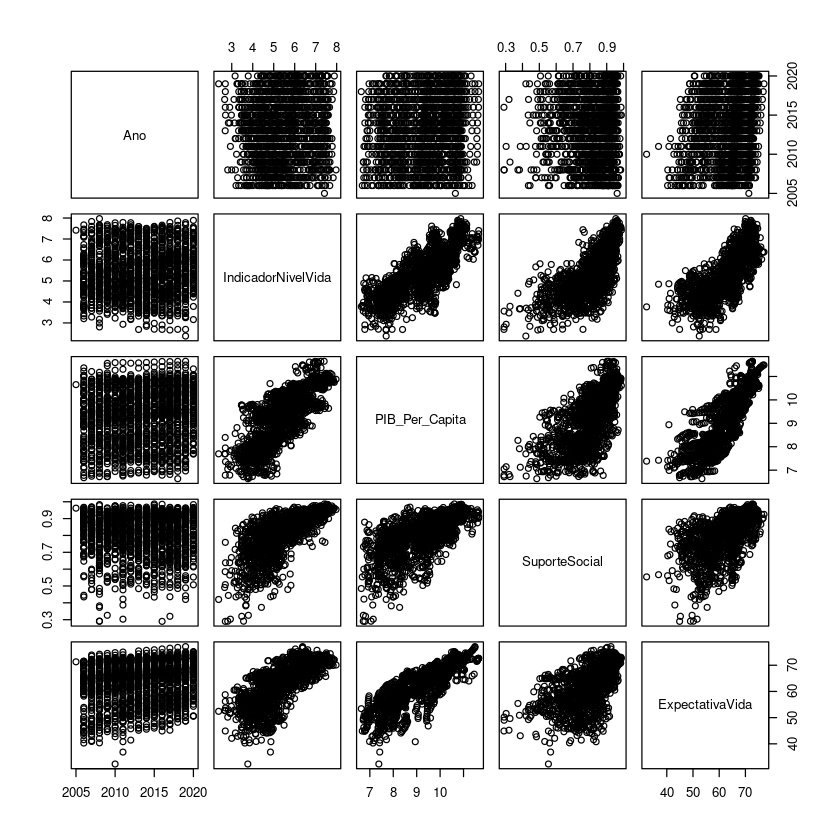

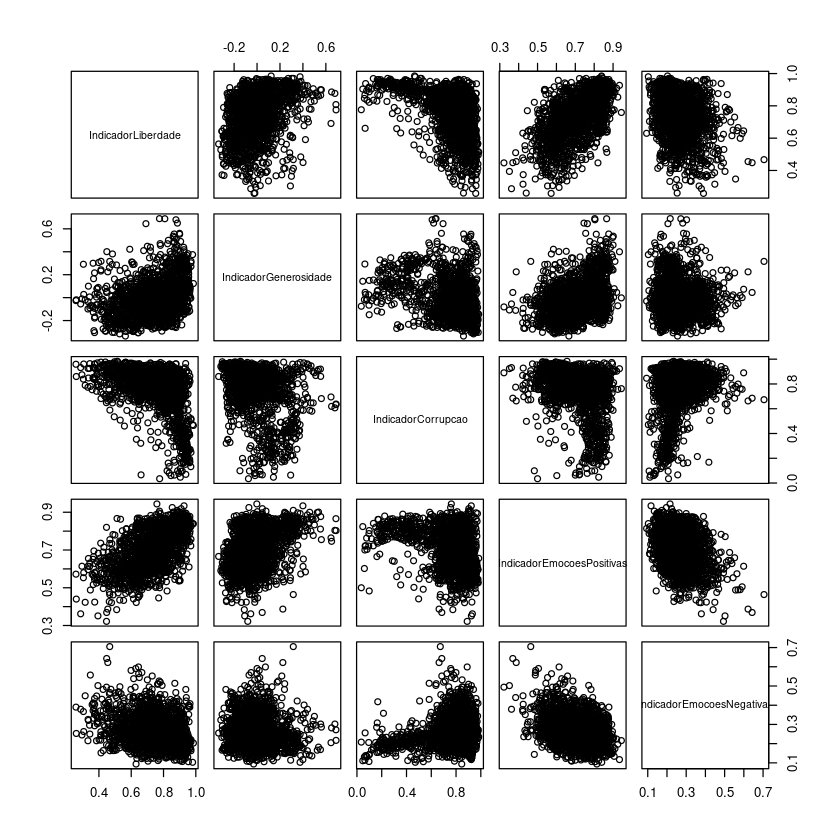

In [25]:
numeric_variable_list <- sapply(dados, is.numeric)
numerical_data <- dados[numeric_variable_list]

cor(numerical_data)
pairs(numerical_data[1:5], labels = colnames(numerical_data)[1:5])
pairs(numerical_data[6:10], labels = colnames(numerical_data)[6:10])

<h3> Vamos às Perguntas de Negócio! </h3>

<h4>Precisamos resumir os dados para cada país. Vamos calcular a média dos indicadores por país
e então, comparar essas médias. (Porém, perdemos o fator tempo - o que não impacta nossa análise)</h4>

In [28]:
indicador_nivel_vida_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorNivelVida = mean(IndicadorNivelVida))

pib_per_capita_pais_media <- dados %>%
  group_by(NomePais) %>%
  summarize(PIB_Per_Capita = mean(PIB_Per_Capita))

suporte_social_pais_media <- dados %>%
  group_by(NomePais) %>%
  summarize(SuporteSocial = mean(SuporteSocial))

expectativa_vida_media <- dados %>%
  group_by(NomePais) %>%
  summarize(ExpectativaVida = mean(ExpectativaVida))

indicador_liberdade_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorLiberdade = mean(IndicadorLiberdade))

indicador_generosidade_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorGenerosidade = mean(IndicadorGenerosidade))

indicador_corrupcao_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorCorrupcao = mean(IndicadorCorrupcao))

indicador_emocoes_pos_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorEmocoesPositivas = mean(IndicadorEmocoesPositivas))

indicador_emocoes_neg_media <- dados %>%
  group_by(NomePais) %>%
  summarize(IndicadorEmocoesNegativas = mean(IndicadorEmocoesNegativas))

df_medias <- merge(indicador_nivel_vida_media, pib_per_capita_pais_media)
df_medias <- merge(df_medias, suporte_social_pais_media)
df_medias <- merge(df_medias, expectativa_vida_media)
df_medias <- merge(df_medias, indicador_liberdade_media)
df_medias <- merge(df_medias, indicador_generosidade_media)
df_medias <- merge(df_medias, indicador_corrupcao_media)
df_medias <- merge(df_medias, indicador_emocoes_pos_media)
df_medias <- merge(df_medias, indicador_emocoes_neg_media)

View(df_medias)

NomePais,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3.594667,7.650833,0.5084167,52.26667,0.5181667,0.070083333,0.8433333,0.5486667,0.3265000
Albania,5.019385,9.384385,0.7162308,67.54615,0.6629231,-0.082692308,0.8693846,0.6538462,0.2992308
Algeria,5.191800,9.329400,0.8116000,65.43600,0.5044000,-0.132200000,0.7056000,0.5944000,0.2564000
Angola,4.420250,8.990000,0.7382500,53.55000,0.4562500,-0.088250000,0.8667500,0.6135000,0.3512500
Argentina,6.310133,10.033800,0.9044000,67.90000,0.7682000,-0.159866667,0.8420667,0.8334667,0.2840000
Armenia,4.513571,9.270357,0.7185714,65.74286,0.5637143,-0.199642857,0.8465000,0.5502143,0.4340714
Australia,7.277538,10.763000,0.9457692,72.79231,0.9206923,0.274230769,0.4174615,0.7973846,0.2114615
Austria,7.242231,10.886846,0.9295385,72.10308,0.9061538,0.130461538,0.5702308,0.7880769,0.1781538
Azerbaijan,4.941000,9.519571,0.7705714,63.94286,0.6620714,-0.169642857,0.6983571,0.5730000,0.2306429


<h3>Pergunta 1: O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer? Qual a correlação entre essas duas variáveis? </h3>


	Pearson's product-moment correlation

data:  df_medias$PIB_Per_Capita and df_medias$ExpectativaVida
t = 20.284, df = 153, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8043976 0.8914404
sample estimates:
      cor 
0.8537768 


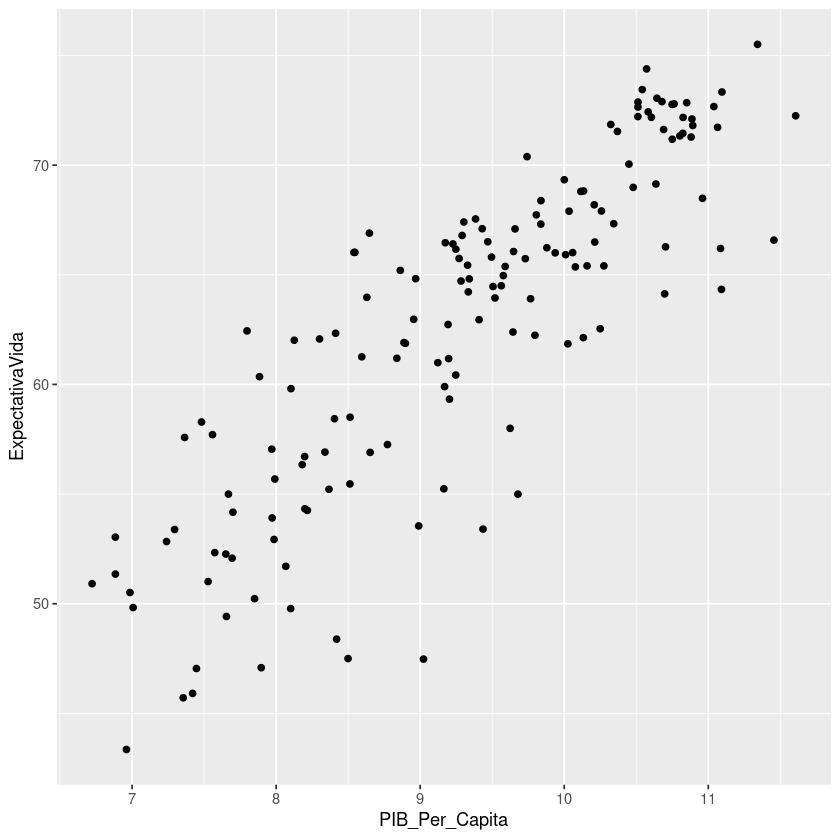

In [29]:
df_medias %>%
  ggplot(aes(x = PIB_Per_Capita, y = ExpectativaVida)) +
  geom_point()

cor.test(df_medias$PIB_Per_Capita, df_medias$ExpectativaVida)

A resposta para esta primeira pergunta é sim: existe uma forte correlação positiva entre o PIB e a expectativa de vida de uma população! Ou seja: quanto maior o PIB Per Capita, maior será a expectativa de vida populacional.
Sei que é do senso comum esta interpretação, porém o que acabamos de fazer aqui, foi justamente comprovar esta informação através de dados socioeconômicos históricos.

<h3>Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?</h3>


	Pearson's product-moment correlation

data:  df_medias$IndicadorNivelVida and df_medias$IndicadorCorrupcao
t = -6.4831, df = 153, p-value = 1.171e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5794676 -0.3307878
sample estimates:
       cor 
-0.4642275 


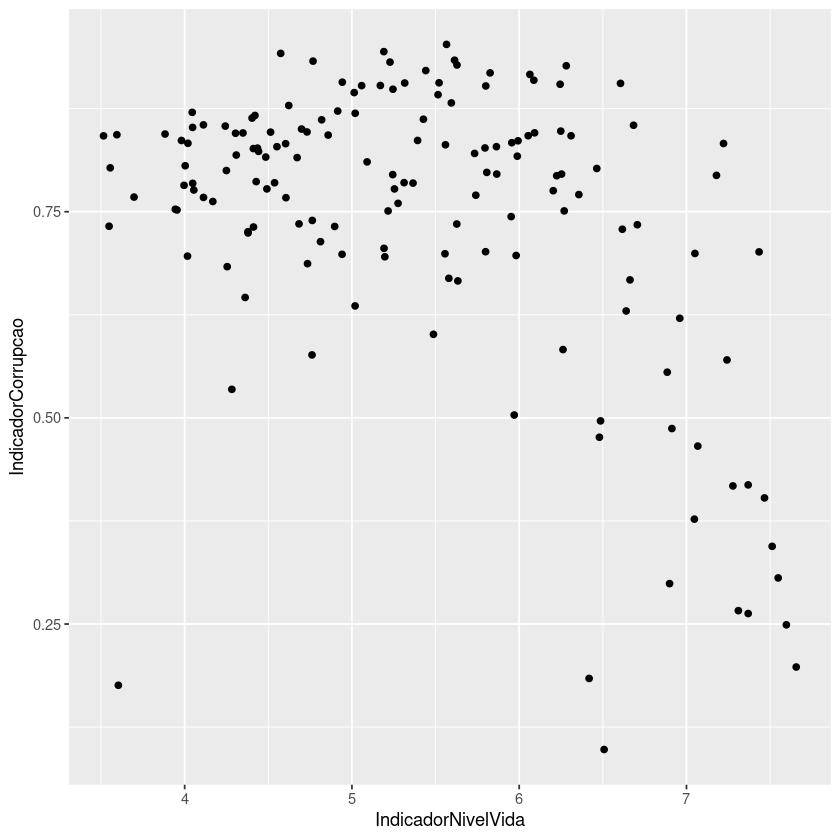

In [30]:
df_medias %>%
  ggplot(aes(x = IndicadorNivelVida, y = IndicadorCorrupcao)) +
  geom_point()

cor.test(df_medias$IndicadorNivelVida, df_medias$IndicadorCorrupcao)

Resposta para esta segunda pergunta: existe uma correlação negativa entre estas duas variáveis! À medida que o nível de vida aumenta, o índice de corrupção tende à diminuir.

<h3>Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral? Qual a correlação entre essas duas variáveis?</h3>


	Pearson's product-moment correlation

data:  df_medias$IndicadorNivelVida and df_medias$IndicadorEmocoesPositivas
t = 8.7567, df = 153, p-value = 3.506e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4622592 0.6740501
sample estimates:
      cor 
0.5778006 


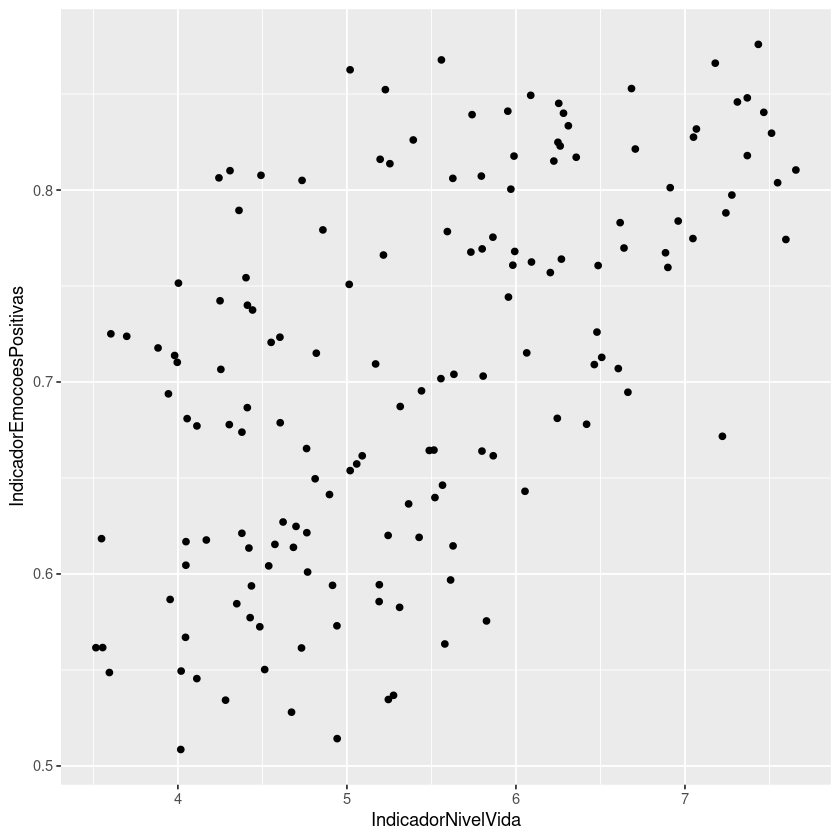

In [31]:
df_medias %>%
  ggplot(aes(x = IndicadorNivelVida, y = IndicadorEmocoesPositivas)) +
  geom_point()

cor.test(df_medias$IndicadorNivelVida, df_medias$IndicadorEmocoesPositivas)

Reposta: Existe uma correlação positiva entre essas variáveis. À medida em que o nível de vida aumenta, a felicidade da população tente à aumentar também!

<h3>Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?</h3>

In [42]:
# Buscando país com menor índice de suporte social:
menor_indice <- df_medias[df_medias$SuporteSocial == min(df_medias$SuporteSocial), ]
View(menor_indice)

#Comparação desses valores da Central African Republic com os valores máximos desses indicadores da nossa lista geral dos países
paste("Índice de Suporte Social de Central African Republic: ", menor_indice$SuporteSocial)
paste("Índice de Corrupção de Central African Republic: ", menor_indice$IndicadorCorrupcao)
paste("Maior índice de Suporte Social (todos países): ", max(df_medias$SuporteSocial))
paste("Maior índice de Corrupção (todos países): ", max(df_medias$IndicadorCorrupcao))

,NomePais,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,Central African Republic,3.515,6.961,0.4024,43.356,0.6804,0.027,0.842,0.5616,0.3914


[1] "Índice de Suporte Social de Central African Republic:  0.4024"

[1] "Índice de Corrupção de Central African Republic:  0.842"

[1] "Maior índice de Suporte Social (todos países):  0.976857142857143"

[1] "Maior índice de Corrupção (todos países):  0.952916666666667"

,NomePais,Ano,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
309,Central African Republic,2007,4.160,6.987,0.532,40.90,0.663,0.081,0.782,0.568,0.330
310,Central African Republic,2010,3.568,7.091,0.483,42.70,0.690,-0.036,0.845,0.523,0.257
311,Central African Republic,2011,3.678,7.125,0.387,43.08,0.780,-0.016,0.834,0.524,0.277
312,Central African Republic,2016,2.693,6.785,0.290,44.90,0.624,0.033,0.859,0.579,0.494
313,Central African Republic,2017,3.476,6.817,0.320,45.20,0.645,0.073,0.890,0.614,0.599



	Pearson's product-moment correlation

data:  Africa_Central$SuporteSocial and Africa_Central$IndicadorCorrupcao
t = -2.3863, df = 3, p-value = 0.09706
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9869007  0.2551565
sample estimates:
       cor 
-0.8092953 


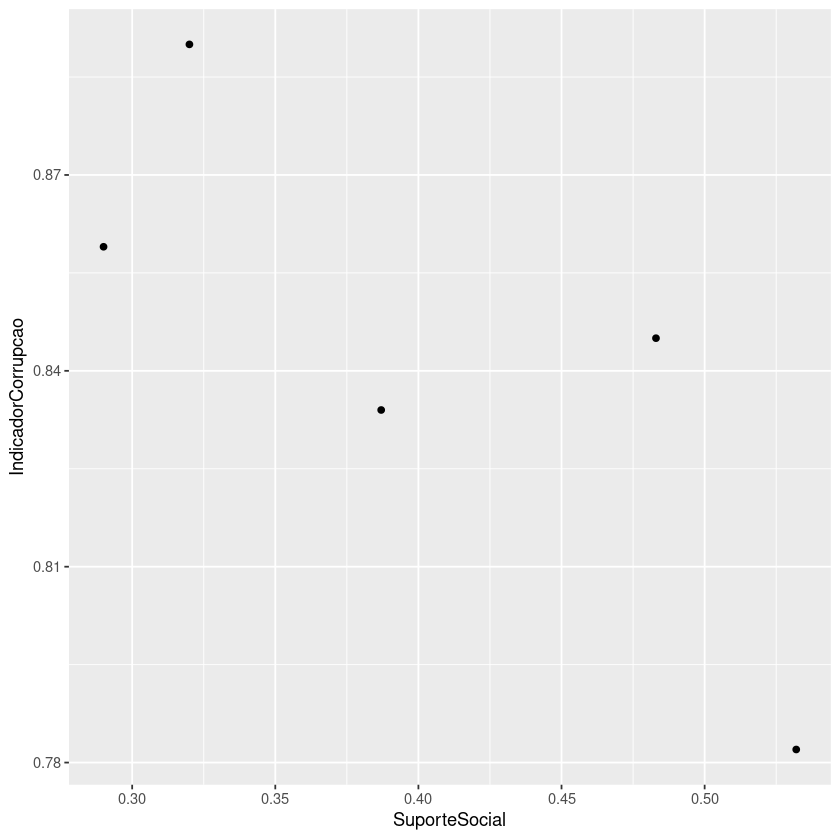

In [36]:
# Vamos observar a correlação destas variáveis pra este país

Africa_Central <- dados[dados$NomePais == "Central African Republic", ]
View(Africa_Central)

Africa_Central %>%
  ggplot(aes(x = SuporteSocial, y = IndicadorCorrupcao)) +
  geom_point()

cor.test(Africa_Central$SuporteSocial, Africa_Central$IndicadorCorrupcao)

Resposta: Podemos observar que quando diminui o suporte social, aumenta a percepção de corrupção!


<h3>Pergunta 5: Pessoas generosas são mais felizes?</h3>


	Pearson's product-moment correlation

data:  df_medias$IndicadorGenerosidade and df_medias$IndicadorEmocoesPositivas
t = 5.3653, df = 153, p-value = 2.935e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2563736 0.5227898
sample estimates:
      cor 
0.3979384 


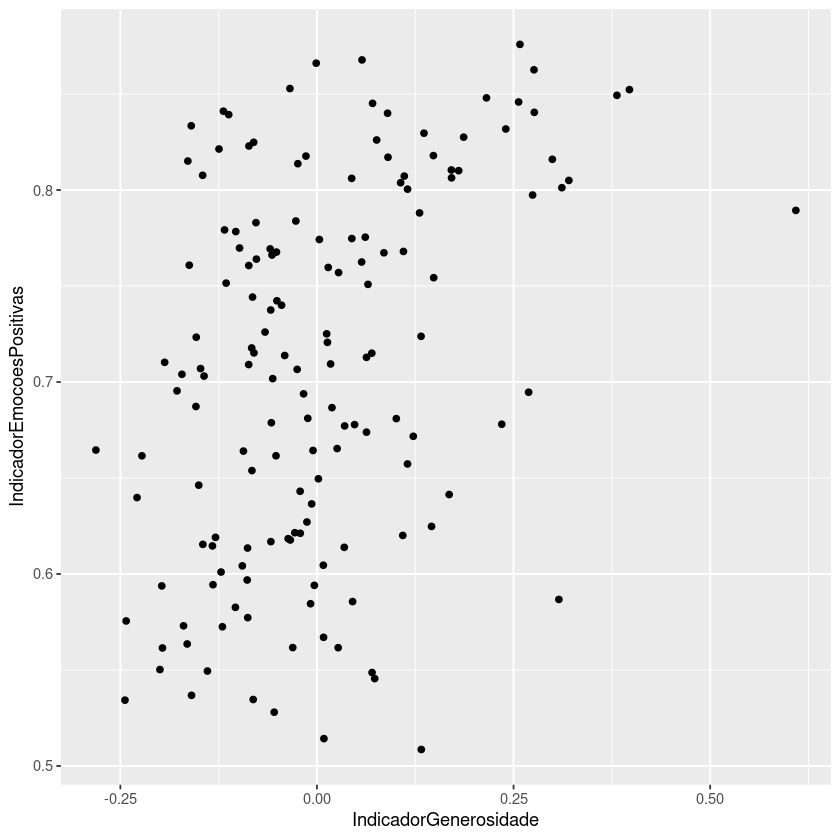

In [43]:
df_medias %>%
  ggplot(aes(x = IndicadorGenerosidade, y = IndicadorEmocoesPositivas)) +
  geom_point()

cor.test(df_medias$IndicadorGenerosidade, df_medias$IndicadorEmocoesPositivas)


Resposta: Sim, existe uma correlação positiva entre estas variáveis! Ou seja, quanto mais generosa é uma pessoa, mais feliz ela é!